In [2]:
# If you are working with a shape file stored in google drive remove the quotes (""" """)

"""
#connect with drive
from google.colab import drive
drive.mount('/content/drive')
"""

Mounted at /content/drive


In [5]:
%load_ext rpy2.ipython

In [6]:
%%R
# data:
# https://www.dane.gov.co/index.php/estadisticas-por-tema/pobreza-y-condiciones-de-vida/pobreza-y-desigualdad/medida-de-pobreza-multidimensional-de-fuente-censal
install.packages("raster")
install.packages("maptools")
install.packages("rgdal")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependency ‘sp’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/sp_1.4-5.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1049195 bytes (1.0 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]:

In [19]:
%%R
# libraries
library(raster)
library(maptools)
library(rgdal)

OGR data source with driver: ESRI Shapefile 
Source: "/content/drive/MyDrive/Dengue_MAPS/polygons/MPM/shapefile/MPM_FuenteCensal_2018.shp", layer: "MPM_FuenteCensal_2018"
with 1122 features
It has 53 fields


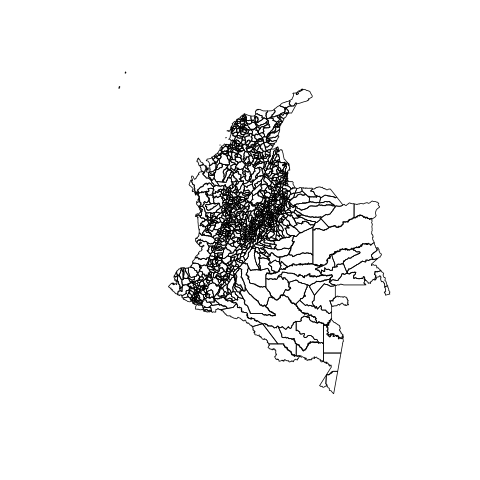

In [23]:
%%R
# load a polygon (Municipalities Colombia)
# If you are working in Drive your path here:
path = "/content/drive/MyDrive/path/shapefile/MPM_FuenteCensal_2018.shp"
# In local machine with the github structure
path = "Data/MPM2018_shapefile/MPM_FuenteCensal_2018.shp""

colombian_map <- readOGR(path)
# Plot data
plot(colombian_map)

In [11]:
%%R
# See the Columns
names(colombian_map)

 [1] "DPTO_CCDGO" "MPIO_CCDGO" "MPIO_CNMBR" "MPIO_CCNCT" "DPTO_CNMBR"
 [6] "MPM"        "MPM_CAB"    "MPM_CPRD"   "AFBMO_TOT"  "AFBMO_CAB" 
[11] "AFBMO_CPRD" "BLE_TOT"    "BLE_CAB"    "BLE_CPRD"   "BSCPI_TOT" 
[16] "BSCPI_CAB"  "BSCPI_CPRD" "BASS_TOT"   "BASS_CAB"   "BASS_CPRD" 
[21] "TDE_TOT"    "TDE_CAB"    "TDE_CPRD"   "HC_TOT"     "HC_CAB"    
[26] "HC_CPRD"    "IEE_TOT"    "IEE_CAB"    "IEE_CPRD"   "IE_TOT"    
[31] "IE_CAB"     "IE_CPRD"    "MIPE_TOT"   "MIPE_CAB"   "MIPE_CPRD" 
[36] "MIP_TOT"    "MIP_CAB"    "MIP_CPRD"   "RE_TOT"     "RE_CAB"    
[41] "RE_CPRD"    "SAFAM_TOT"  "SAFAM_CAB"  "SAFAM_CPRD" "SAS_TOT"   
[46] "SAS_CAB"    "SAS_CPRD"   "TRINF_TOT"  "TRINF_CAB"  "TRINF_CPRD"
[51] "TRIML_TOT"  "TRIML_CAB"  "TRIML_CPRD"


In [14]:
%%R
# 1122 Rows (For each municipality)
# 53 columns (For each feature)
print(dim(colombian_map))

[1] 1122   53


In [16]:
%%R
# Summary for the first three rows
head(colombian_map,3)

  DPTO_CCDGO MPIO_CCDGO             MPIO_CNMBR MPIO_CCNCT DPTO_CNMBR  MPM
0         18        001              FLORENCIA      18001    CAQUETÁ 29.6
1         18        029                ALBANIA      18029    CAQUETÁ 38.8
2         18        094 BELÉN DE LOS ANDAQUÍES      18094    CAQUETÁ 50.0
  MPM_CAB MPM_CPRD AFBMO_TOT AFBMO_CAB AFBMO_CPRD BLE_TOT BLE_CAB BLE_CPRD
0    27.2     53.3       9.1       8.4       16.7    47.8    45.5     73.6
1    26.6     48.9      12.1       9.1       14.8    68.7    58.6     77.6
2    41.4     66.1      18.4      16.8       21.8    67.5    60.7     81.4
  BSCPI_TOT BSCPI_CAB BSCPI_CPRD BASS_TOT BASS_CAB BASS_CPRD TDE_TOT TDE_CAB
0       2.3       2.2        2.8      4.8      4.6       7.1    35.4    35.1
1       1.1       0.7        1.4      4.1      2.6       5.4    41.6    44.4
2       2.7       2.1        3.8      4.2      2.7       7.4    55.7    57.5
  TDE_CPRD HC_TOT HC_CAB HC_CPRD IEE_TOT IEE_CAB IEE_CPRD IE_TOT IE_CAB IE_CPRD
0     38.6   10.

In [21]:
%%R
# See the internal structure of the shape file
str(colombian_map)

Formal class 'SpatialPolygonsDataFrame' [package "sp"] with 5 slots
  ..@ data       :'data.frame':	1122 obs. of  53 variables:
  .. ..$ DPTO_CCDGO: chr [1:1122] "18" "18" "18" "18" ...
  .. ..$ MPIO_CCDGO: chr [1:1122] "001" "029" "094" "247" ...
  .. ..$ MPIO_CNMBR: chr [1:1122] "FLORENCIA" "ALBANIA" "BELÉN DE LOS ANDAQUÍES" "EL DONCELLO" ...
  .. ..$ MPIO_CCNCT: chr [1:1122] "18001" "18029" "18094" "18247" ...
  .. ..$ DPTO_CNMBR: chr [1:1122] "CAQUETÁ" "CAQUETÁ" "CAQUETÁ" "CAQUETÁ" ...
  .. ..$ MPM       : num [1:1122] 29.6 38.8 50 44.3 45.5 56.2 64.6 42.4 48.7 50 ...
  .. ..$ MPM_CAB   : num [1:1122] 27.2 26.6 41.4 37.6 40.3 34.9 38.1 33.6 41.6 35.6 ...
  .. ..$ MPM_CPRD  : num [1:1122] 53.3 48.9 66.1 60.7 53.4 61.5 68.7 53 57.6 59.1 ...
  .. ..$ AFBMO_TOT : num [1:1122] 9.1 12.1 18.4 14.7 14.7 16.3 18.2 13.6 13.4 15 ...
  .. ..$ AFBMO_CAB : num [1:1122] 8.4 9.1 16.8 13.5 15 12.4 16.2 14.5 11.8 15.1 ...
  .. ..$ AFBMO_CPRD: num [1:1122] 16.7 14.8 21.8 18.1 14.2 17.3 18.6 12.6 15.5

In [22]:
%%R
# with @data we can get just the dataframe of features for each municipality
head(colombian_map@data)

  DPTO_CCDGO MPIO_CCDGO             MPIO_CNMBR MPIO_CCNCT DPTO_CNMBR  MPM
0         18        001              FLORENCIA      18001    CAQUETÁ 29.6
1         18        029                ALBANIA      18029    CAQUETÁ 38.8
2         18        094 BELÉN DE LOS ANDAQUÍES      18094    CAQUETÁ 50.0
3         18        247            EL DONCELLO      18247    CAQUETÁ 44.3
4         18        256              EL PAUJÍL      18256    CAQUETÁ 45.5
5         18        410           LA MONTAÑITA      18410    CAQUETÁ 56.2
  MPM_CAB MPM_CPRD AFBMO_TOT AFBMO_CAB AFBMO_CPRD BLE_TOT BLE_CAB BLE_CPRD
0    27.2     53.3       9.1       8.4       16.7    47.8    45.5     73.6
1    26.6     48.9      12.1       9.1       14.8    68.7    58.6     77.6
2    41.4     66.1      18.4      16.8       21.8    67.5    60.7     81.4
3    37.6     60.7      14.7      13.5       18.1    68.2    62.8     82.6
4    40.3     53.4      14.7      15.0       14.2    72.5    66.0     81.3
5    34.9     61.5      16.3    